In [1]:
from datasets import load_dataset
from sklearn.feature_extraction.text import CountVectorizer

c:\Users\rsaif\OneDrive - McGill University\COMP-551\COMP-551\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Download emotion dataset to without separate train/test splits
dataset = load_dataset("emotion", cache_dir="./data")

In [3]:
# Tokenize the dataset
vectorizer = CountVectorizer()
# Extract text and labels
X = vectorizer.fit_transform(dataset["train"]["text"])
# dataset["train"]["text"]
X = X.toarray()
import numpy as np 
np.argwhere(X[0, :] == 1)
y = np.array(dataset["train"]["label"]).reshape(-1, 1)

In [4]:
X_test = vectorizer.transform(dataset["test"]["text"])
X_test = X_test.toarray()
y_test = np.array(dataset["test"]["label"]).reshape(-1, 1)

In [7]:
from naive_bayes import NaiveBayes
# Train the model
model = NaiveBayes()
model.fit(X, y)
# Predict on the test set
# y_pred = model.predict(X_test)
alpha_test_list = [0.1, 0.5, 1, 5, 10, 50, 100]
acc_list = []
f1_list = []
precision_list = []
recall_list = []
for alpha in alpha_test_list:
    model.alpha = alpha
    y_hat_test = model.predict(X_test)
    acc_list.append(model.evaluate_acc(y_hat_test, y_test))
    f1, precision, recall = model.compute_F1(y_hat_test, y_test)
    f1_list.append([f1.tolist()])
    precision_list.append([precision.tolist()])
    recall_list.append([recall.tolist()])
acc_list

[0.7805, 0.8, 0.7635, 0.6055, 0.555, 0.431, 0.389]

In [10]:
for i in range(len(f1_list)):
    print("alpha: ", alpha_test_list[i])
    print("F1: ", f1_list[i])
    print("Precision: ", precision_list[i])
    print("Recall: ", recall_list[i])

alpha:  0.1
F1:  [[[0.8242220303125157], [0.8333333283277875], [0.6148648598509405], [0.7448015072670552], [0.7123287620933676], [0.49999999515432114]]]
Precision:  [[[0.8059210526183237], [0.8053691275059682], [0.6642335765938515], [0.7755905511505673], [0.7289719625827583], [0.6428571427040817]]]
Recall:  [[[0.8433734939613877], [0.8633093525055638], [0.5723270439891618], [0.7163636363375867], [0.6964285713974808], [0.40909090902892564]]]
alpha:  0.5
F1:  [[[0.85099601095015], [0.8575197839414321], [0.5403225759999349], [0.7636363586672381], [0.7347931823526974], [0.23999999782400006]]]
Precision:  [[[0.7922848664570877], [0.7917174177735479], [0.7528089886794597], [0.8590909090518595], [0.8074866309728617], [0.9999999988888888]]]
Recall:  [[[0.9191049913783287], [0.9352517985476942], [0.42138364777224], [0.6872727272477355], [0.6741071428270488], [0.13636363634297521]]]
alpha:  1
F1:  [[[0.8285280678951071], [0.8377874407006115], [0.3487179456715319], [0.6997742616257918], [0.639566

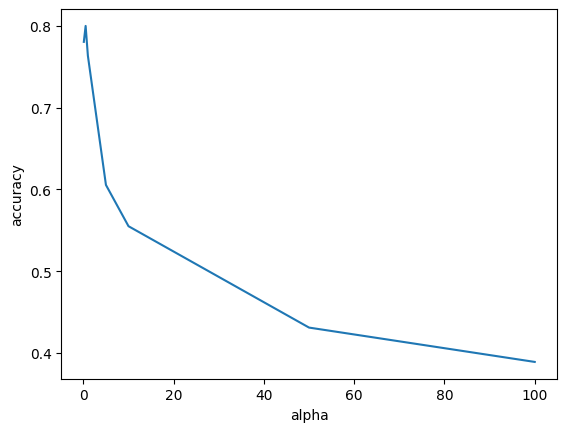

In [11]:
alpha_np = np.array(alpha_test_list)
acc_np = np.array(acc_list)
import matplotlib.pyplot as plt
plt.plot(alpha_np, acc_np)
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.show()


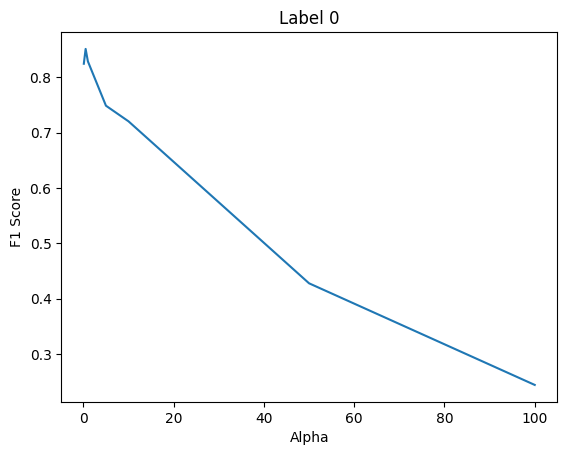

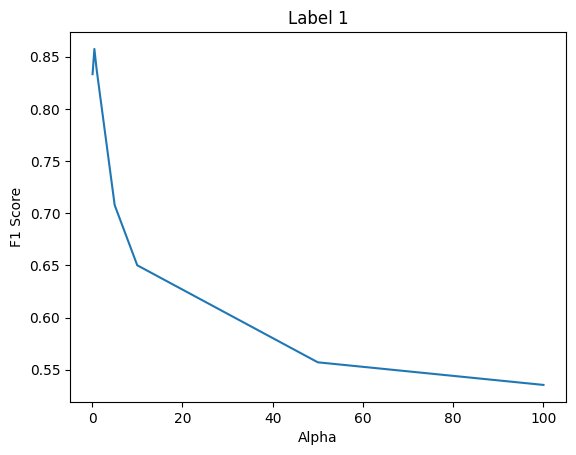

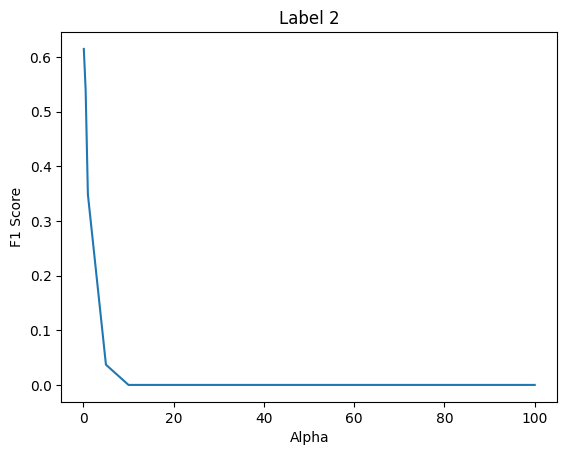

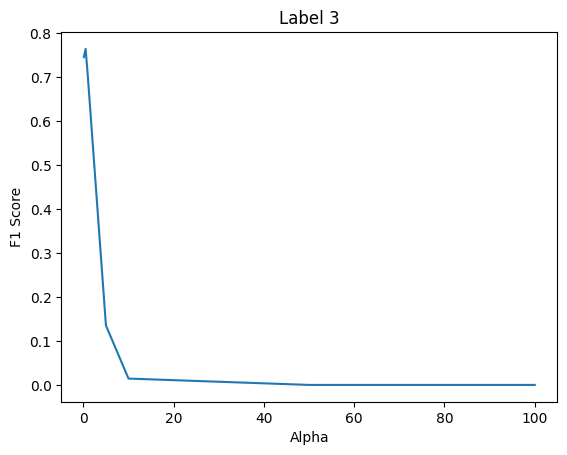

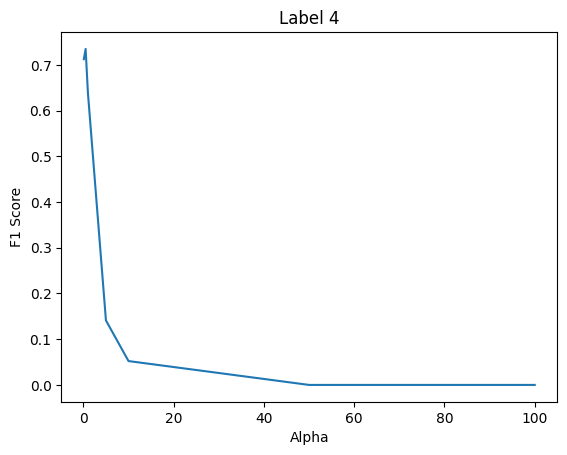

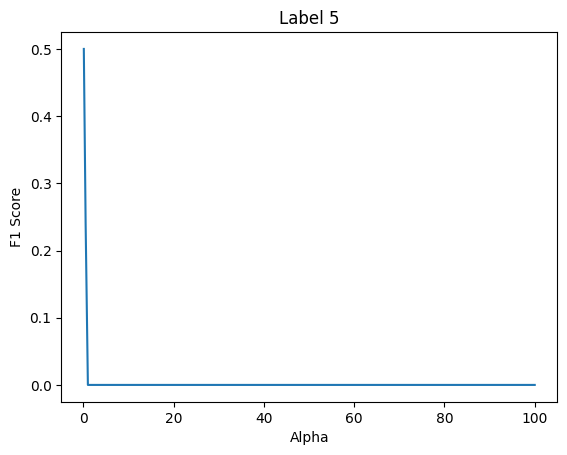

In [21]:
f1_np = np.array(f1_list).reshape(7, 6)
precision_np = np.array(precision_list).reshape(7, 6)
recall_np = np.array(recall_list).reshape(7, 6)
for i in range(6):
  plt.plot(alpha_np, f1_np[:, i])
  plt.xlabel("Alpha")
  plt.ylabel("F1 Score")
  plt.title(f"Label {i}")
  plt.show()


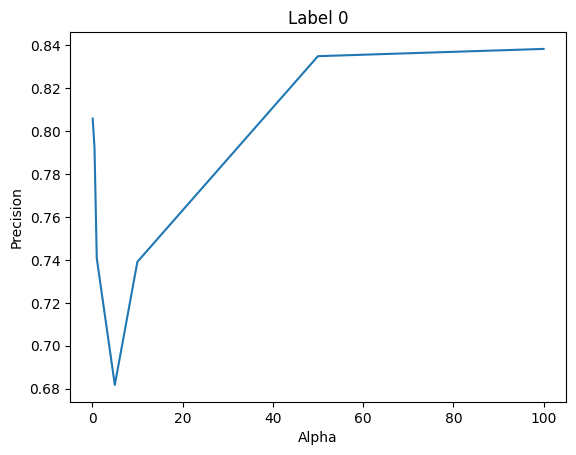

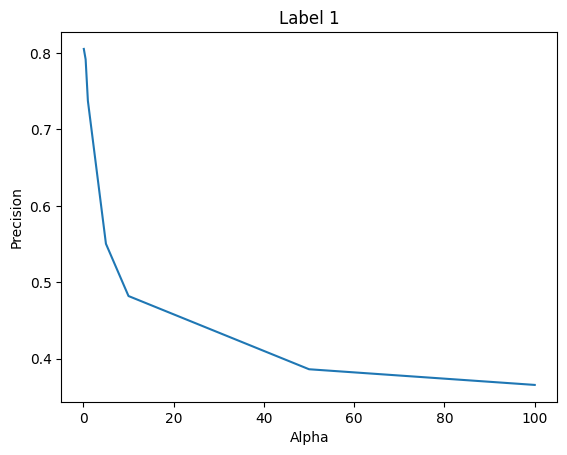

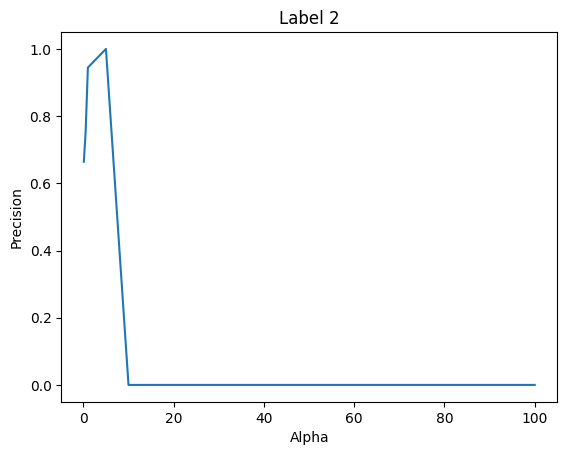

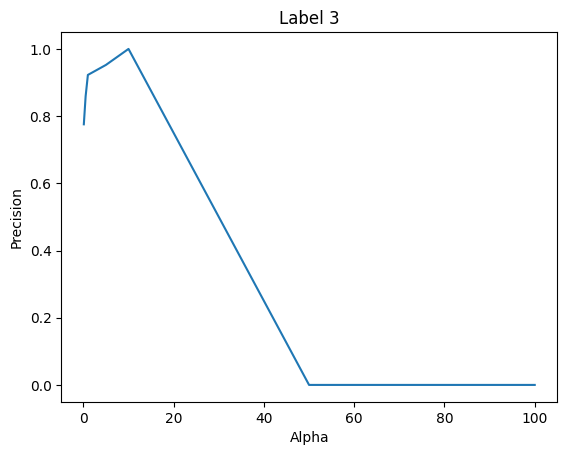

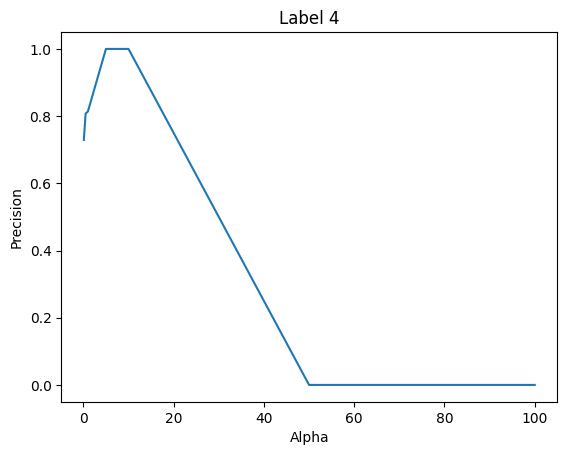

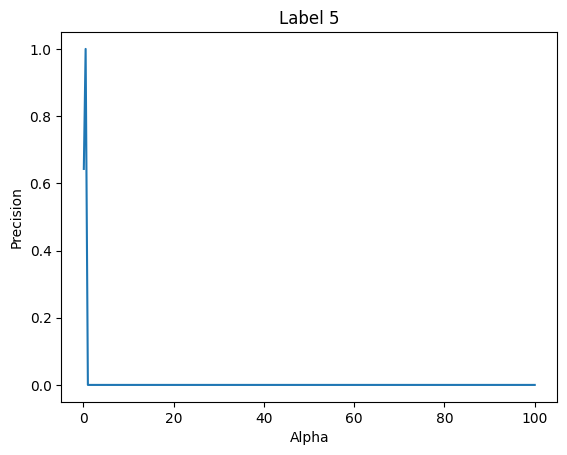

In [22]:
for i in range(6):
  plt.plot(alpha_np, precision_np[:, i])
  plt.xlabel("Alpha")
  plt.ylabel("Precision")
  plt.title(f"Label {i}")
  plt.show()

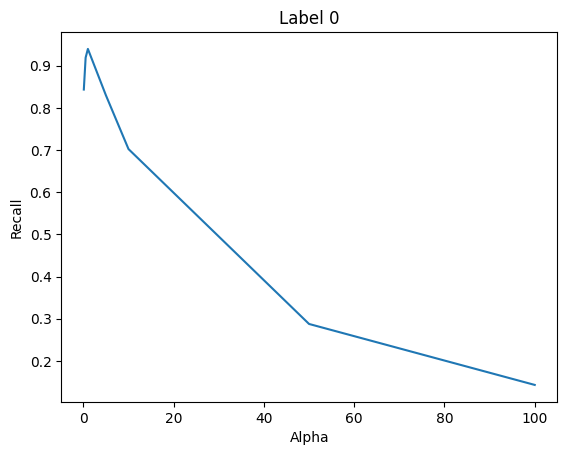

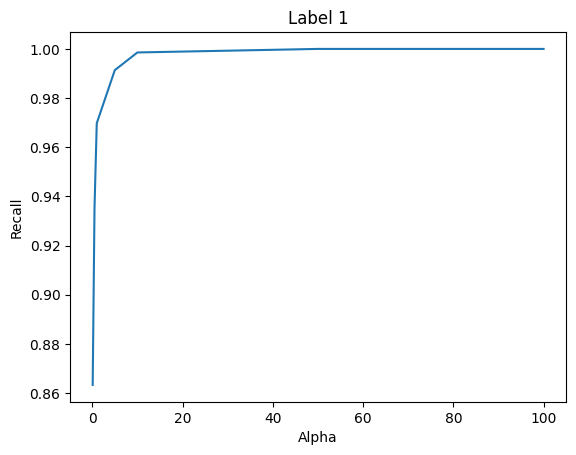

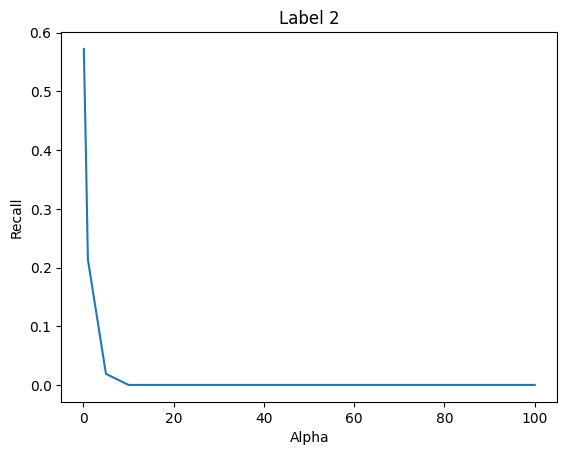

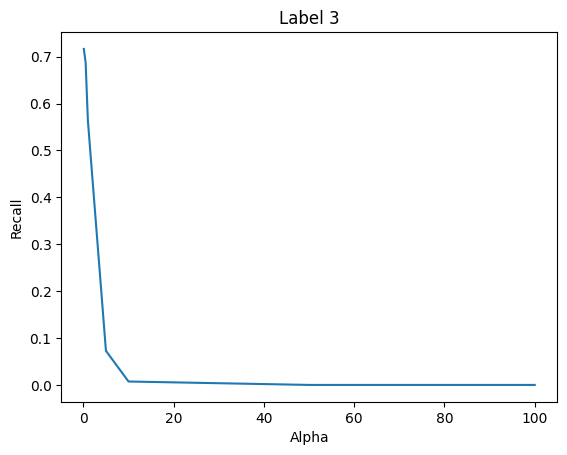

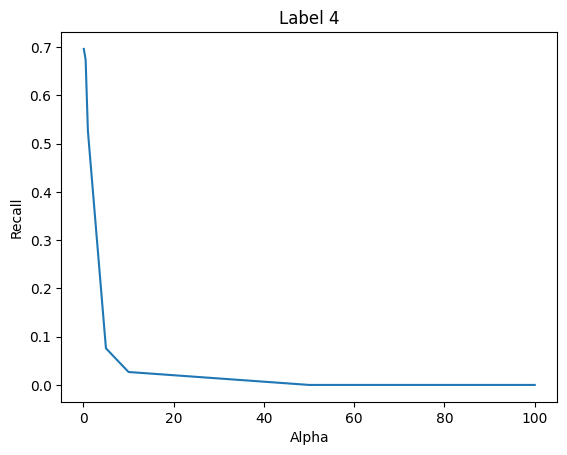

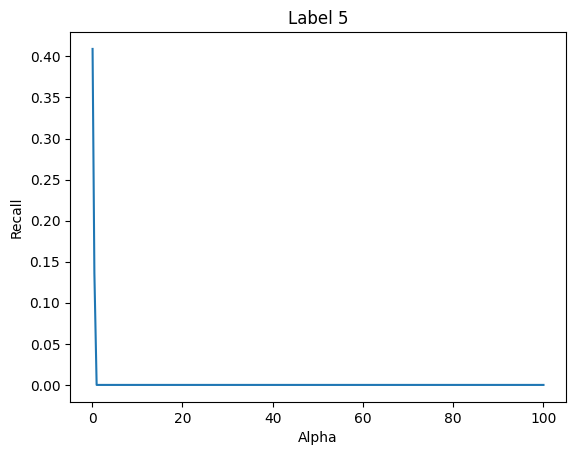

In [23]:
for i in range(6):
  plt.plot(alpha_np, recall_np[:, i])
  plt.xlabel("Alpha")
  plt.ylabel("Recall")
  plt.title(f"Label {i}")
  plt.show()

In [8]:
X.shape

(16000, 15186)

We now test to see how Naive Bayes performs with different model sizes

In [19]:
# Test with different training set sizes
np.random.seed(10)
idxs = np.arange(X.shape[0])
train_sizes = [100, 500, 1000, 5000, 10000, 15000]
acc_list = []
for train_size in train_sizes:
    rand_idxs = np.random.choice(idxs, size=train_size, replace=False)
    X_rand = X[rand_idxs, :]
    y_rand = y[rand_idxs]
    model = NaiveBayes()
    model.fit(X_rand, y_rand)
    y_hat_test = model.predict(X_test)
    acc_list.append(model.evaluate_acc(y_hat_test, y_test))
acc_list

[0.38, 0.4535, 0.499, 0.639, 0.719, 0.7585]

In [22]:
acc_list

[0.38, 0.4535, 0.499, 0.639, 0.719, 0.7585]

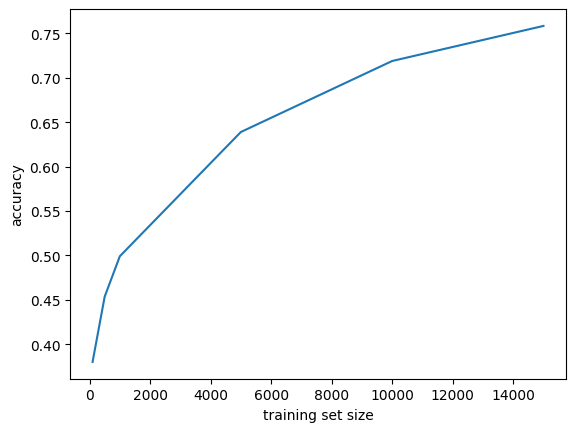

In [24]:
# Plot the results
train_size_np = np.array(train_sizes)
acc_np = np.array(acc_list)
plt.plot(train_size_np, acc_np)
plt.xlabel("training set size")
plt.ylabel("accuracy")
plt.show()